# Chapter 2

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from itertools import cycle

In [8]:
sns.set(style='ticks')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [9]:
df = pd.read_csv('teaching_method.csv')
df

,ID,Name,Sex,Math,Statistics,Psychology_test,Statistics_test1,Statistics_test2,Method
0,1,大村,m,dislike,like,13,6,10,C
1,2,本多,m,dislike,like,14,10,13,B
2,3,川崎,m,like,like,7,6,8,B
3,4,多村,m,like,like,12,10,15,A
4,5,松中,m,dislike,dislike,10,5,8,B
5,6,小久保,m,dislike,dislike,6,3,6,C
6,7,柴原,m,dislike,dislike,8,5,9,A
7,8,井手,m,dislike,dislike,15,9,10,D
8,9,田上,m,dislike,dislike,4,3,7,D
9,10,松田,m,like,dislike,14,3,3,D


In [5]:
# 度数
df['Method'].value_counts()

D    5
C    5
B    5
A    5
Name: Method, dtype: int64

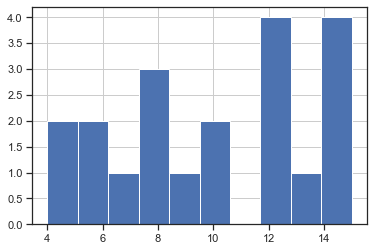

In [11]:
# ヒストグラム
df['Psychology_test'].hist()
plt.show()

In [52]:
# 代表値
testA = df['Statistics_test2'].iloc[:5]
# mean
mean = testA.mean()
print(mean)
# median
median = testA.median()
print(median)
# mode(最頻値)
mode = testA.mode().values[0]
print(mode)

10.8
10.0
8


In [53]:
# 偏差
deviation = np.array(testA - mean)
print(deviation)

[-0.8  2.2 -2.8  4.2 -2.8]


In [47]:
# 分散
variance = np.sum(deviation**2) / len(deviation)
print('{:.2f}'.format(variance))

7.76


In [63]:
# variance
# pandsのモジュールは不偏分散
# numpyと上で求めたものは標本分散
print('{:.2f}'.format(testA.var()))
print('{:.2f}'.format(testA.var()*(len(testA)-1)/len(testA)))
print('{:.2f}'.format(np.var(testA)))

9.70
7.76
7.76


In [61]:
# standard deviation
print('{:.6f}'.format(testA.std()))
print('{:.6f}'.format(np.sqrt(testA.var()*(len(testA)-1)/len(testA))))
print('{:.6f}'.format(np.std(testA)))

3.114482
2.785678
2.785678


In [56]:
# 平均偏差
deviation_abs = np.abs(deviation)
print(deviation_abs)
print(np.mean(deviation_abs))

[0.8 2.2 2.8 4.2 2.8]
2.56


In [57]:
# 範囲(range)
print(np.max(testA)-np.min(testA))

7


### 2.10 標準化

In [58]:
psy_test = df['Psychology_test'].values
psy_test

array([13, 14,  7, 12, 10,  6,  8, 15,  4, 14,  9,  6, 10, 12,  5, 12,  8,
        8, 12, 15])

In [64]:
psy_mean = np.mean(psy_test)
print(psy_mean)
psy_std = np.std(psy_test)
print(psy_std)

10.0
3.331666249791536


In [66]:
psy_z = (psy_test-psy_mean) / psy_std
print(psy_z)

[ 0.90045034  1.20060045 -0.90045034  0.60030023  0.         -1.20060045
 -0.60030023  1.50075056 -1.80090068  1.20060045 -0.30015011 -1.20060045
  0.          0.60030023 -1.50075056  0.60030023 -0.60030023 -0.60030023
  0.60030023  1.50075056]


In [67]:
print(np.mean(psy_z))
print(np.std(psy_z))

2.2204460492503132e-17
1.0


$偏差値 = z得点 \times 10 + 50$

In [68]:
psy_deviation_value = 10*psy_z + 50
print(psy_deviation_value)

[59.00450338 62.0060045  40.99549662 56.00300225 50.         37.9939955
 43.99699775 65.00750563 31.99099324 62.0060045  46.99849887 37.9939955
 50.         56.00300225 34.99249437 56.00300225 43.99699775 43.99699775
 56.00300225 65.00750563]


In [71]:
psy_deviation_mean = np.mean(psy_deviation_value)
print(psy_deviation_mean)
print(np.sqrt(np.mean((psy_deviation_value-psy_deviation_mean)**2)))

50.00000000000001
10.000000000000002


## 練習問題

In [72]:
# 1
a_univ = [60,100,50,40,50,230,120,240,200,30]
b_univ = [50,60,40,50,100,80,30,20,100,120]

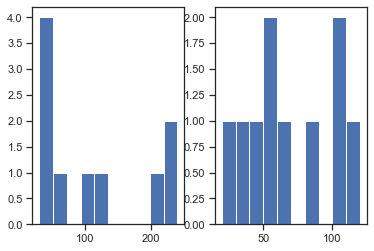

In [74]:
fig, axes = plt.subplots(1,2)
axes[0].hist(a_univ)
axes[1].hist(b_univ)
plt.show()

In [75]:
# 2
print(np.mean(a_univ), np.mean(b_univ))
print(np.std(a_univ), np.std(b_univ))

112.0 65.0
77.82030583337487 31.701734968294716


In [76]:
# 3
a_uni_z = (a_univ-np.mean(a_univ)) / np.std(a_univ)
b_uni_z = (b_univ-np.mean(b_univ)) / np.std(b_univ)
print(a_uni_z)
print(b_uni_z)

[-0.66820606 -0.1542014  -0.79670723 -0.92520839 -0.79670723  1.51631375
  0.10280093  1.64481492  1.13081026 -1.05370956]
[-0.47316022 -0.15772007 -0.78860037 -0.47316022  1.10404052  0.47316022
 -1.10404052 -1.41948067  1.10404052  1.73492082]
